In [1]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

# Networks with different properties
In an Erdos-Renyi random network, one can increase and decrease the number $n_c$ of connected components using the connection probability $p$.

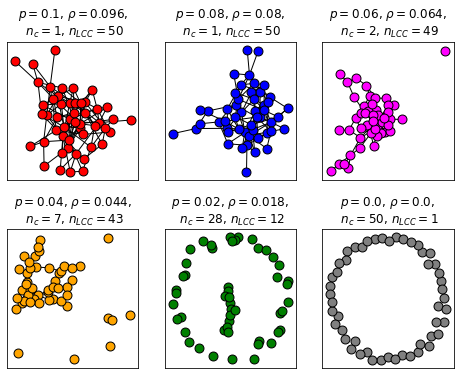

In [2]:
# set number of nodes
num_nodes = 50

# make a big figure
plt.figure(figsize=(8,6))

# define colors for nodes
colors = ['red','blue','magenta','orange','green', 'grey']

# make and draw networks
for i in range(6):
    # make a random network in which every two nodes are connected by an edge with probability p
    p = 0.1-0.02*i
    G = nx.erdos_renyi_graph(num_nodes, p, seed=1)
    
    # draw network
    ax = plt.subplot(2,3,1+i)
    nx.draw(G, pos=nx.spring_layout(G), node_size=80, 
            node_color=colors[i], edgecolors='k', linewidths=1)
    
    # add box around graph
    ax.axis('on')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    # info for plot labels
    n_c = nx.number_connected_components(G) # number of connected components
    n_lcc = len(max(nx.connected_components(G), key=len)) # number of nodes in largest connected component
    
    # add plot label
    plt.title((r'$p=$'+str(np.round(p,2))
               +r', $\rho=$'+str(np.round(G.number_of_edges()/(num_nodes*(num_nodes-1)/2),3))
               +',\n $n_c=$'+str(n_c)
               +r', $n_{LCC}=$'+str(n_lcc)))

plt.subplots_adjust(hspace=0.35)

# Networks and their degree distributions

We show only three networks now but include their degree distributions. When the number of nodes is large (`num_nodes=1000` or more), this make take a while to run because matplotlib needs to draw thousands of little circles...

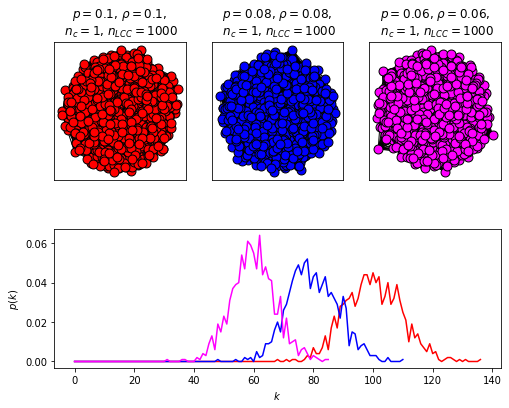

In [5]:
# set number of nodes
num_nodes = 1000

# make a big figure
plt.figure(figsize=(8,6))

# make subplot for distributions
ax2 = plt.subplot(212)

# make and draw networks
for i in range(3):
    # make a random network in which every two nodes are connected by an edge with probability p
    p = 0.1-0.02*i
    G = nx.erdos_renyi_graph(num_nodes, p, seed=1)
    
    # draw network
    ax = plt.subplot(2,3,1+i)
    nx.draw(G, pos=nx.spring_layout(G), node_size=80, 
            node_color=colors[i], edgecolors='k', linewidths=1)
    
    # add box around graph
    ax.axis('on')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    # info for plot labels
    n_c = nx.number_connected_components(G) # number of connected components
    n_lcc = len(max(nx.connected_components(G), key=len)) # number of nodes in largest connected component
    
    # add plot label
    plt.title((r'$p=$'+str(np.round(p,2))
               +r', $\rho=$'+str(np.round(G.number_of_edges()/(num_nodes*(num_nodes-1)/2),3))
               +',\n $n_c=$'+str(n_c)
               +r', $n_{LCC}=$'+str(n_lcc)))
    
    # get degree distribution
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_histogram, bins = np.histogram(degree_sequence, 
                                          bins=range(np.max(degree_sequence)+2))
    degree_distribution = degree_histogram/len(degree_sequence)

    # draw degree distribution
    ax2.plot(bins[:-1], degree_distribution, color=colors[i])
    ax2.set_xlabel(r'$k$')
    ax2.set_ylabel(r'$p(k)$')
    
plt.subplots_adjust(hspace=0.35)